# Clasificadores Binarios

## Resumen

En esta notebook se presentan ejemplos de funcionamiento de clasificadores binarios aplicados a la predicción del diagnóstico de una enfermedad.
Para ello, se utilizan distintos algoritmos aplicados sobre algunos conjuntos de datos públicos, a los fines de analizar pros y contras de cada caso.

## 1. Inicialización

### Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
#
separador=os.sep

### Datasets

In [2]:
# Para elegir el Dataset, comentar el que no desea utilizar:
archivo='datasets'+str(separador)+'diabetes.csv';target='Diabetes';LABELS=('NEG','POS')
#archivo='breast_cancer.csv';target='target';LABELS=('NEG','POS')
df = pd.read_csv(archivo)

In [3]:
# Visualizacion:
general=df.head()
print('Encabezado: primeras 5 filas\n'+str(general))
# cuantas filas y columnas tiene el df
forma=df.shape
print('Shape: Filas y Columnas de la Matriz '+str(forma))
# La ocurrencia de casos positivos y no positivos
participacion=pd.value_counts(df[target], sort = True)
vectorParticipacion=(participacion[0],participacion[1])
proporcion=(100*participacion[1])/(participacion[0]+participacion[1])
if(proporcion>35 and proporcion<65):
    balanceado='SI'
else:
    balanceado='NO'
print('Dataset balanceado: '+str(balanceado))
normalizado='SI'
for i in range(df.shape[1]):
    for j in range(df.shape[0]):
        if(df.iloc[i,j]>1):
            normalizado='NO'
            break
print('Dataset normalizado: '+str(normalizado))
print('Dataset:  ',archivo,' Registros: ',len(df),' Balanceado=',balanceado,' Normalizado=',normalizado)

Encabezado: primeras 5 filas
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Diabetes  
0                     627.0   50         1  
1                     351.0   31         0  
2                     672.0   32         1  
3                     167.0   21         0  
4                    2288.0   33         1  
Shape: Filas y Columnas de la Matriz (768, 9)
Dataset balanceado: NO
Dataset normalizado: NO
Dataset:   datasets/diabetes.csv  Registros:  768  Balanceado= NO  Normalizado= NO


/tmp/ipykernel_18215/2759812844.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop([target],1).hist(figsize=(10,8))


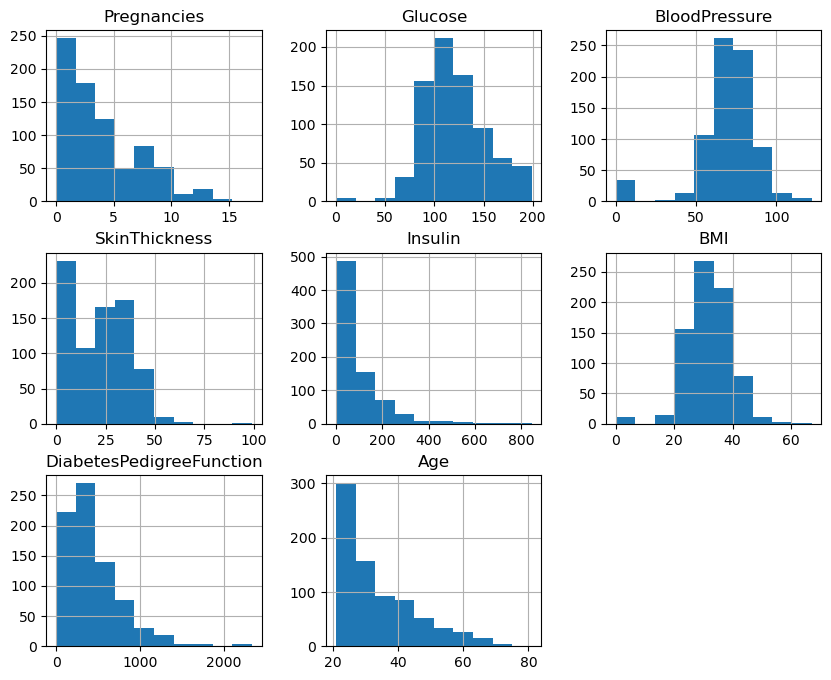

In [4]:
df.drop([target],1).hist(figsize=(10,8))
plt.show()

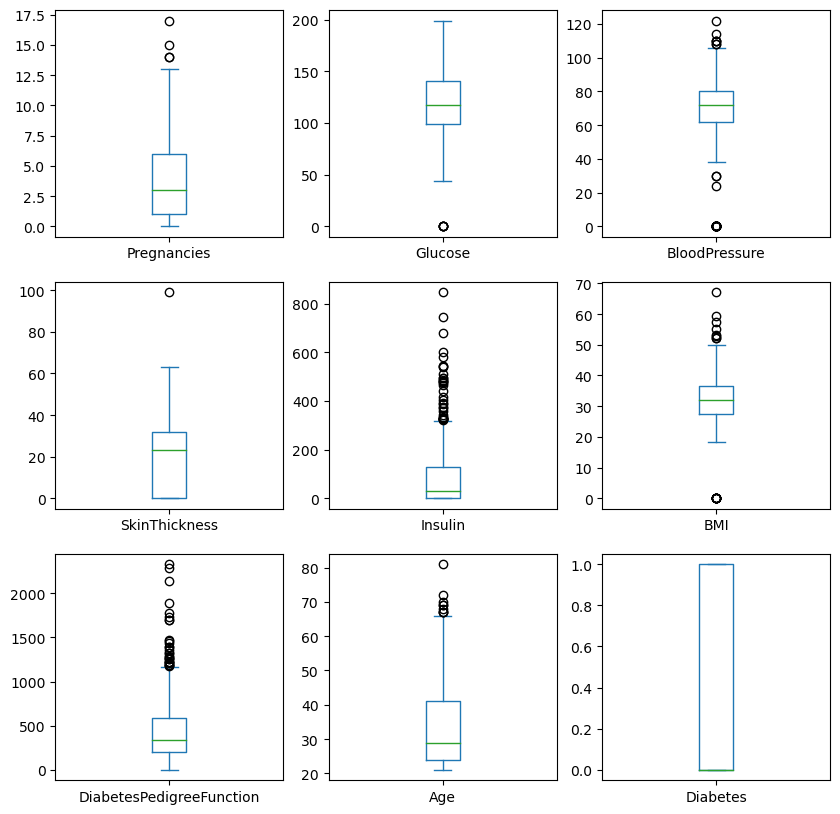

In [5]:
# Boxplots
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(10,10))
plt.show()

Text(0, 0.5, 'Cantidad de Observaciones')

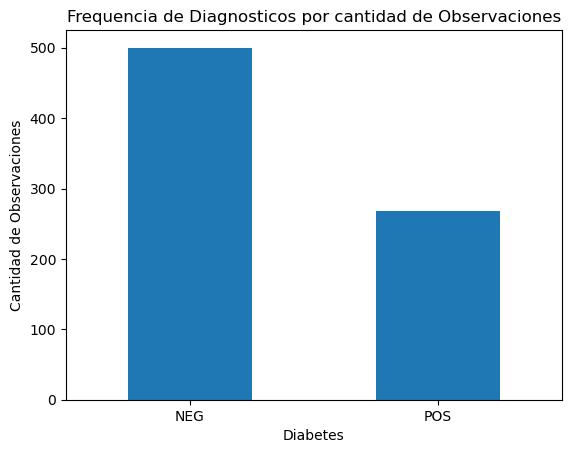

In [6]:
# Grafico:
count_classes = pd.value_counts(df[target], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Frequencia de Diagnosticos por cantidad de Observaciones")
plt.xlabel(target)
plt.ylabel("Cantidad de Observaciones")


## 2. Pre-Procesamiento

In [7]:
X = np.array(df.drop([target],1))
y = np.array(df[target])
# Normalizacion:
X_Norm=preprocessing.scale(X)
if(normalizado=='NO'):
    X=X_Norm
# Manejo de balanceo de datos
balancear=None
if(balanceado=='NO'):
    balancear='balanced'
# Split del Dataset en Train / Test 
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

/tmp/ipykernel_18215/409321591.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop([target],1))


## 3. Entrenamiento y Evaluación de Modelos

### 3.1. Regresión Logística:

#### Entrenamiento

In [8]:
model = linear_model.LogisticRegression(class_weight=balancear)
model.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

#### Evaluación

In [9]:
model.score(X_test,Y_test)
predictions = model.predict(X_test)
# Confusion Matrix
matrizConfusion=confusion_matrix(Y_test, predictions)
print('Confusion Matrix:\n',matrizConfusion)
# Evaluation Report
print('\nReporte de las Clasificaciones\n',classification_report(Y_test, predictions))

Confusion Matrix:
 [[79 18]
 [12 45]]

Reporte de las Clasificaciones
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        97
           1       0.71      0.79      0.75        57

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.81      0.81      0.81       154



### 3.2. Red Neuronal

#### Entrenamiento

In [24]:
model = MLPClassifier()
params1={'activation': 'tanh', 'alpha': 0.1, 'batch_size': 5, 'hidden_layer_sizes': 10, 'max_iter': 200}
params2={'activation': 'relu', 'alpha': 0.1, 'batch_size': 20, 'hidden_layer_sizes': 20, 'max_iter': 200}
params=params1
model.set_params(**params)
model.fit(X_train, Y_train)

MLPClassifier(activation='tanh', alpha=0.1, batch_size=5, hidden_layer_sizes=10)

#### Evaluación

In [26]:
model.score(X_test,Y_test)
predictions = model.predict(X_test)
# Confusion Matrix
matrizConfusion=confusion_matrix(Y_test, predictions)
print('Confusion Matrix:\n',matrizConfusion)
# Evaluation Report
print('\nReporte de las Clasificaciones\n',classification_report(Y_test, predictions))

Confusion Matrix:
 [[89  8]
 [24 33]]

Reporte de las Clasificaciones
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        97
           1       0.80      0.58      0.67        57

    accuracy                           0.79       154
   macro avg       0.80      0.75      0.76       154
weighted avg       0.79      0.79      0.78       154



### 3.3. Random Forest

In [27]:
# Crear el modelo Random Forest
rf_model = RandomForestClassifier()

# Entrenar el modelo
rf_model.fit(X_train, Y_train)

# Hacer predicciones
rf_predictions = rf_model.predict(X_test)

# Evaluar el modelo
rf_matrizConfusion = confusion_matrix(Y_test, rf_predictions)
print('Random Forest - Confusion Matrix:\n', rf_matrizConfusion)
print('\nRandom Forest - Reporte de las Clasificaciones\n', classification_report(Y_test, rf_predictions))

Random Forest - Confusion Matrix:
 [[88  9]
 [23 34]]

Random Forest - Reporte de las Clasificaciones
               precision    recall  f1-score   support

           0       0.79      0.91      0.85        97
           1       0.79      0.60      0.68        57

    accuracy                           0.79       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.79      0.79      0.78       154



# 4. Conclusiones:

Se generaron tres modelos clasificadores binarios para predecir el diagnóstico positivo o no de Diabetes. <br>
Si bien los modelos poseen niveles de confianza similares, aunque la red neuronal es algo mejor, se observa que el regresor logístico presenta mejor recall para el diagnóstico positivo: 0.77. Esto nos indica que el clasificador creado por regresión logística detecta mejor a los diagnósticos positivos.